In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn[1].csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.customerID.value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

In [7]:
df = df.drop('customerID', axis=1)

In [8]:
df.rename(columns = {'SeniorCitizen':'senior_citizen', 'Partner':'partner', 'Dependents' :'dependents',
                     'PhoneService':'phone_service', 'MultipleLines':'multiple_lines', 'InternetService':'internet_service',
                     'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup', 'DeviceProtection':'device_protection', 
                     'TechSupport':'tech_support', 'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies', 
                     'Contract':'contract', 'PaperlessBilling':'paperless_billing', 'PaymentMethod':'payment_method', 
                     'MonthlyCharges':'monthly_charges', 'TotalCharges':'total_charges', 'Churn':'churn'}, inplace = True) 
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [9]:
df.loc[ df['churn'] == "Yes", 'churn'] = 1
df.loc[ df['churn'] == "No", 'churn'] = 0
df['churn'] = df['churn'].astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [10]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [11]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [12]:
gender_rate = df.groupby(['gender'])['churn'].mean()
gender_rate

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

In [13]:
gender_ratio = pd.DataFrame(gender_rate)
gender_ratio

,churn
gender,
Female,0.269209
Male,0.261603


In [14]:
df.loc[ df['gender'] == 'Male']['churn'].value_counts()

churn
0    2625
1     930
Name: count, dtype: int64

In [15]:
df.loc[ df['gender'] == 'Female']['churn'].value_counts()

churn
0    2549
1     939
Name: count, dtype: int64

In [16]:
df.senior_citizen.value_counts()

senior_citizen
0    5901
1    1142
Name: count, dtype: int64

In [17]:
df.groupby(['senior_citizen'])['churn'].mean()

senior_citizen
0    0.236062
1    0.416813
Name: churn, dtype: float64

In [18]:
df.loc[ df['senior_citizen'] == 1]['churn'].value_counts()

churn
0    666
1    476
Name: count, dtype: int64

In [19]:
df.loc[ df['senior_citizen'] == 0]['churn'].value_counts()

churn
0    4508
1    1393
Name: count, dtype: int64

In [20]:
df.partner.value_counts()

partner
No     3641
Yes    3402
Name: count, dtype: int64

In [21]:
df.groupby(['partner'])['churn'].mean()

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [22]:
df.loc[ df['partner'] == 'Yes']['churn'].value_counts()

churn
0    2733
1     669
Name: count, dtype: int64

In [23]:
df.loc[ df['partner'] == 'No']['churn'].value_counts()

churn
0    2441
1    1200
Name: count, dtype: int64

In [24]:
df.dependents.value_counts()

dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [25]:
df.groupby(['dependents'])['churn'].mean()

dependents
No     0.312791
Yes    0.154502
Name: churn, dtype: float64

In [26]:
df.loc[ df['dependents'] == 'Yes']['churn'].value_counts()

churn
0    1784
1     326
Name: count, dtype: int64

In [27]:
df.loc[ df['dependents'] == 'No']['churn'].value_counts()

churn
0    3390
1    1543
Name: count, dtype: int64

In [28]:
df.phone_service.value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

In [29]:
df.groupby(['phone_service'])['churn'].mean()

phone_service
No     0.249267
Yes    0.267096
Name: churn, dtype: float64

In [30]:
df.loc[ df['phone_service'] == 'Yes']['churn'].value_counts()

churn
0    4662
1    1699
Name: count, dtype: int64

In [31]:
df.loc[ df['phone_service'] == 'No']['churn'].value_counts()

churn
0    512
1    170
Name: count, dtype: int64

In [32]:
df.multiple_lines.value_counts()

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [33]:
df.groupby(['multiple_lines'])['churn'].mean()

multiple_lines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: churn, dtype: float64

In [34]:
df.internet_service.value_counts()

internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [35]:
df.groupby(['internet_service'])['churn'].mean()

internet_service
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: churn, dtype: float64

In [36]:
df.online_security.value_counts()

online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [37]:
df.groupby(['online_security'])['churn'].mean()

online_security
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: churn, dtype: float64

In [38]:
df.online_backup.value_counts()

online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [39]:
df.groupby(['online_backup'])['churn'].mean()

online_backup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: churn, dtype: float64

In [40]:
df.device_protection.value_counts()

device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [41]:
df.groupby(['device_protection'])['churn'].mean()

device_protection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: churn, dtype: float64

In [42]:
df.tech_support.value_counts()

tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [43]:
df.groupby(['tech_support'])['churn'].mean()

tech_support
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: churn, dtype: float64

In [44]:
df.streaming_tv.value_counts()

streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [45]:
df.groupby(['streaming_tv'])['churn'].mean()

streaming_tv
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: churn, dtype: float64

In [46]:
df.streaming_movies.value_counts()

streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [47]:
df.groupby(['streaming_movies'])['churn'].mean()

streaming_movies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: churn, dtype: float64

In [48]:
df.contract.value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [49]:
df.groupby(['contract'])['churn'].mean()

contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: churn, dtype: float64

In [50]:
df.paperless_billing.value_counts()

paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64

In [51]:
df.groupby(['paperless_billing'])['churn'].mean()

paperless_billing
No     0.163301
Yes    0.335651
Name: churn, dtype: float64

In [52]:
df.payment_method.value_counts()

payment_method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [53]:
df.groupby(['payment_method'])['churn'].mean()

payment_method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: churn, dtype: float64

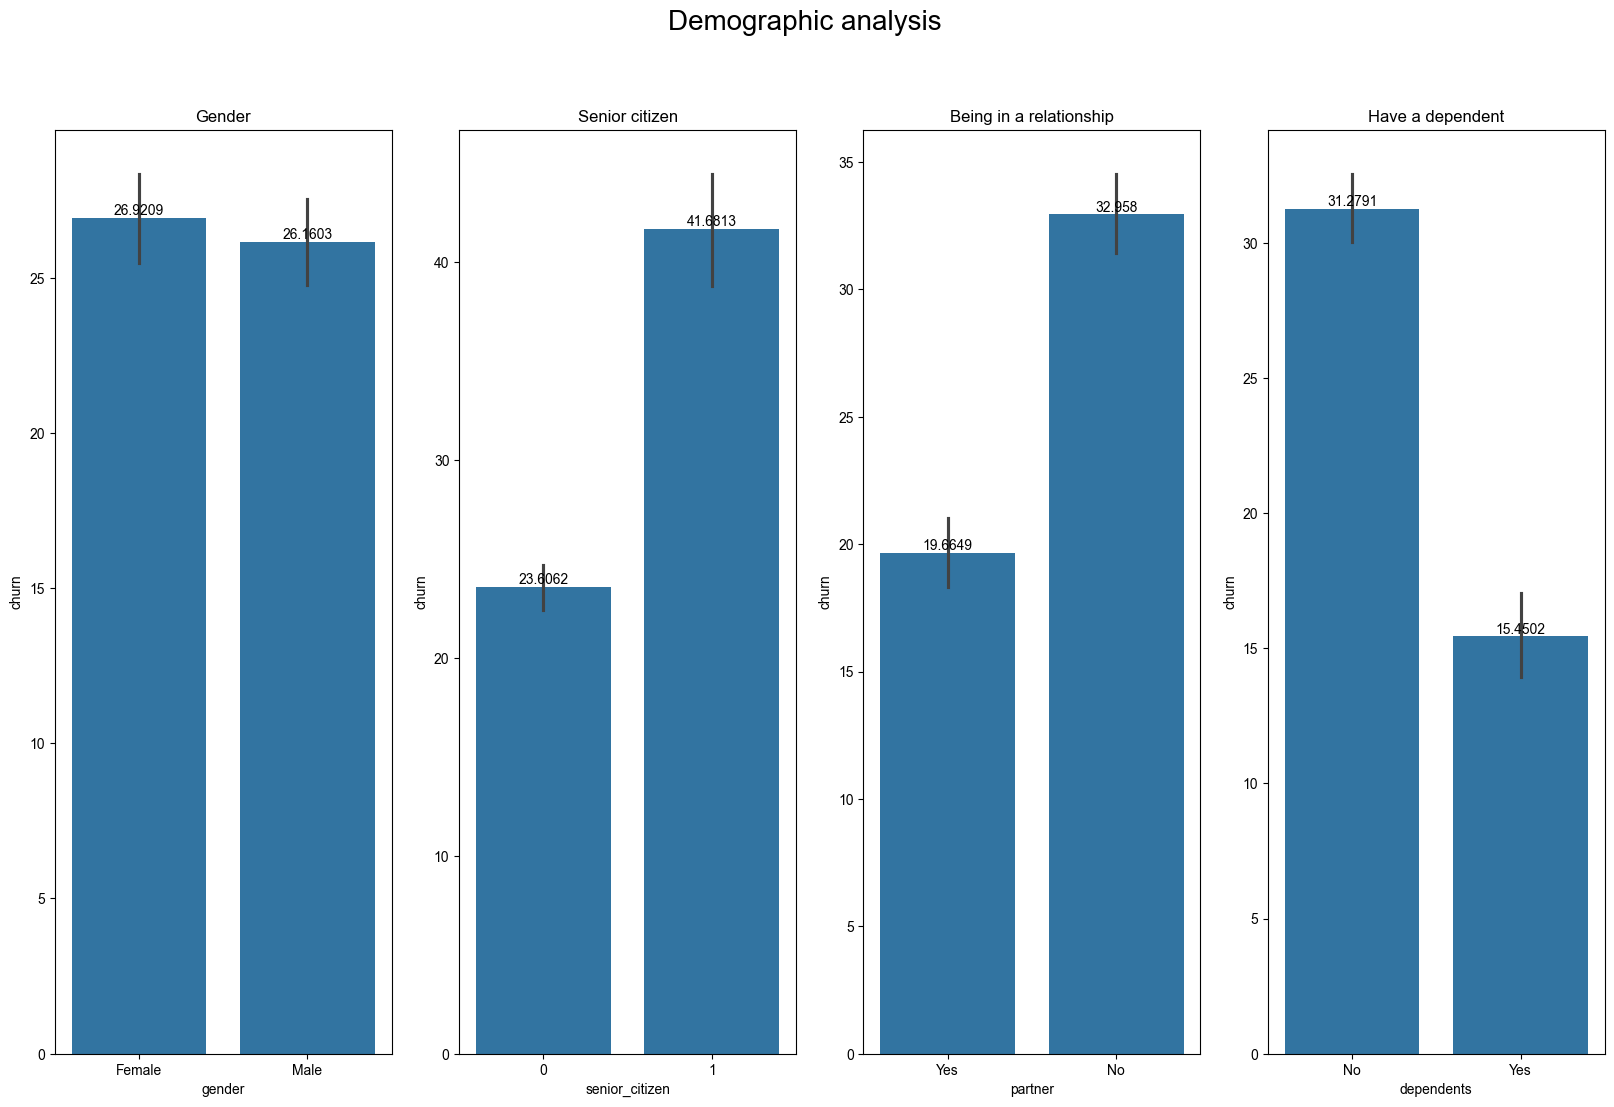

In [54]:
plt.figure(figsize=[20,12])

plt.suptitle('Demographic analysis', fontsize = 20)
plt.subplot(1,4,1)
ax = sns.barplot(x=df['gender'], y=df['churn']*100, data=df);
plt.title('Gender');
ax.bar_label(ax.containers[0])

plt.subplot(1,4,2)
ax= sns.barplot(x=df['senior_citizen'], y=df['churn']*100, data=df);
plt.title('Senior citizen');
ax.bar_label(ax.containers[0])

plt.subplot(1,4,3)
ax = sns.barplot(x=df['partner'], y=df['churn']*100, data=df);
plt.title('Being in a relationship');
ax.bar_label(ax.containers[0])

plt.subplot(1,4,4)
ax = sns.barplot(x=df['dependents'], y=df['churn']*100, data=df);
plt.title('Have a dependent');
ax.bar_label(ax.containers[0])


sns.set_theme(rc={'figure.figsize':(10,7)})

#plt.savefig("Finalnotunaetkiler.png")

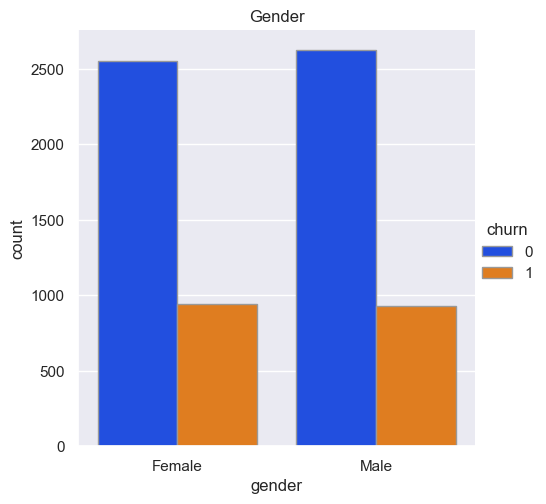

In [55]:
sns.catplot(data=df, x="gender", hue="churn", kind="count", palette="bright", edgecolor=".6").set(title='Gender')
plt.savefig("gender.png", bbox_inches='tight')

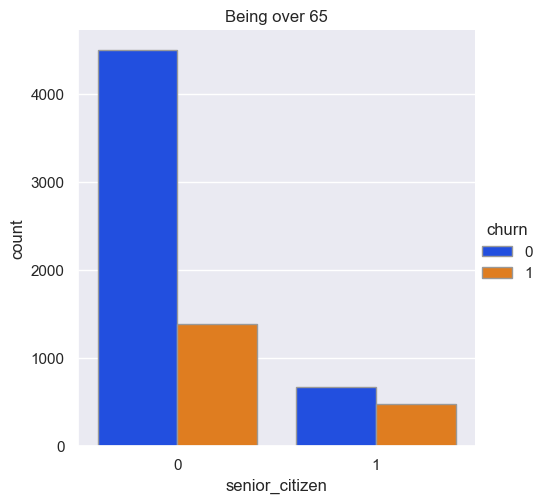

In [56]:
sns.catplot(data=df, x="senior_citizen", hue="churn", kind="count", palette="bright", edgecolor=".6").set(title='Being over 65')
plt.savefig("senior_citizen.png", bbox_inches='tight')

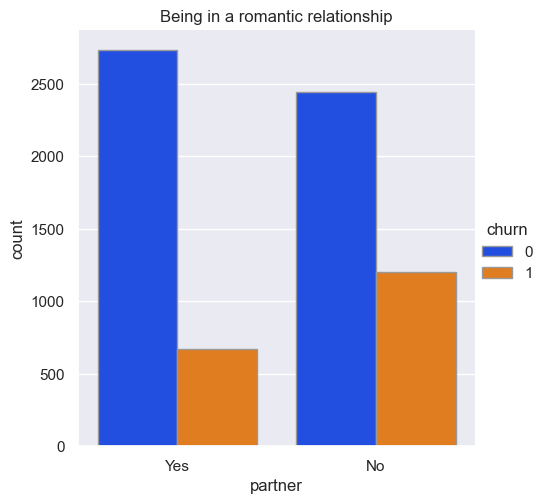

In [57]:
sns.catplot(data=df, x="partner", hue="churn", kind="count", palette="bright", edgecolor=".6").set(title='Being in a romantic relationship')
plt.savefig("partner.png", bbox_inches='tight')

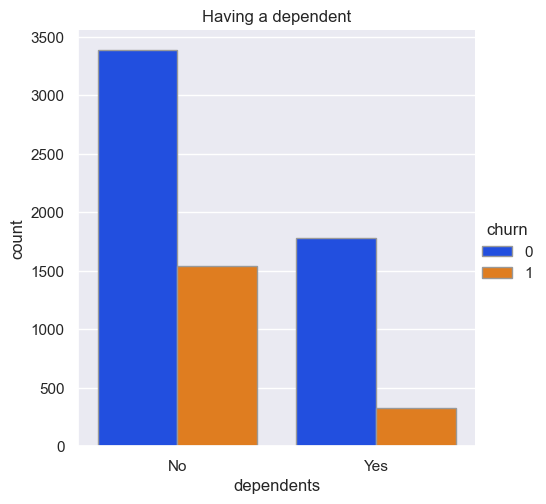

In [58]:
sns.catplot(data=df, x="dependents", hue="churn", kind="count", palette="bright", edgecolor=".6").set(title='Having a dependent')
plt.savefig("dependents.png", bbox_inches='tight')

In [59]:
df.phone_service.value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

In [60]:
df.multiple_lines.value_counts()

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [61]:
df.phone_service.value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

In [62]:
phone_service = pd.DataFrame(df.phone_service.value_counts())
phone_service

,count
phone_service,
Yes,6361
No,682


In [63]:
internet_service =  pd.DataFrame(df.internet_service.value_counts())
internet_service

,count
internet_service,
Fiber optic,3096
DSL,2421
No,1526


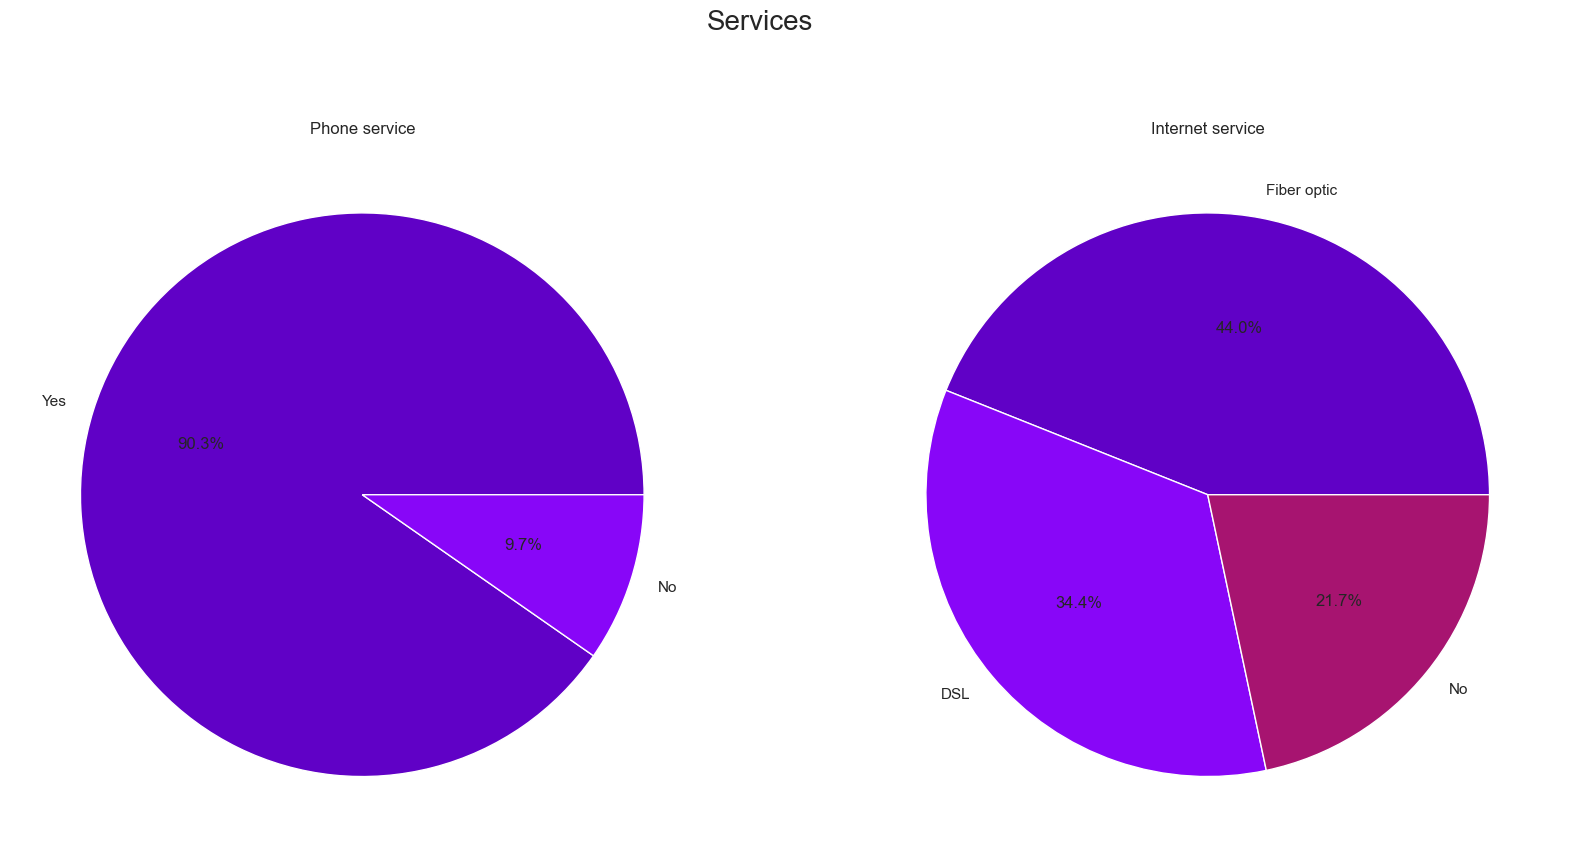

In [64]:
plt.figure(figsize=[20,10])

plt.suptitle('Services', fontsize = 20)
colors = sns.color_palette(palette='gnuplot')
#colors = sns.color_palette(palette='CMRmap')
plt.subplot(1,2,1)
plt.pie(phone_service['count'], labels=phone_service.index, colors=colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%')
plt.title('Phone service');
plt.subplot(1,2,2)
plt.pie(internet_service['count'], labels=internet_service.index, colors=colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%')
plt.title('Internet service');
plt.savefig("musterihizmet.png")

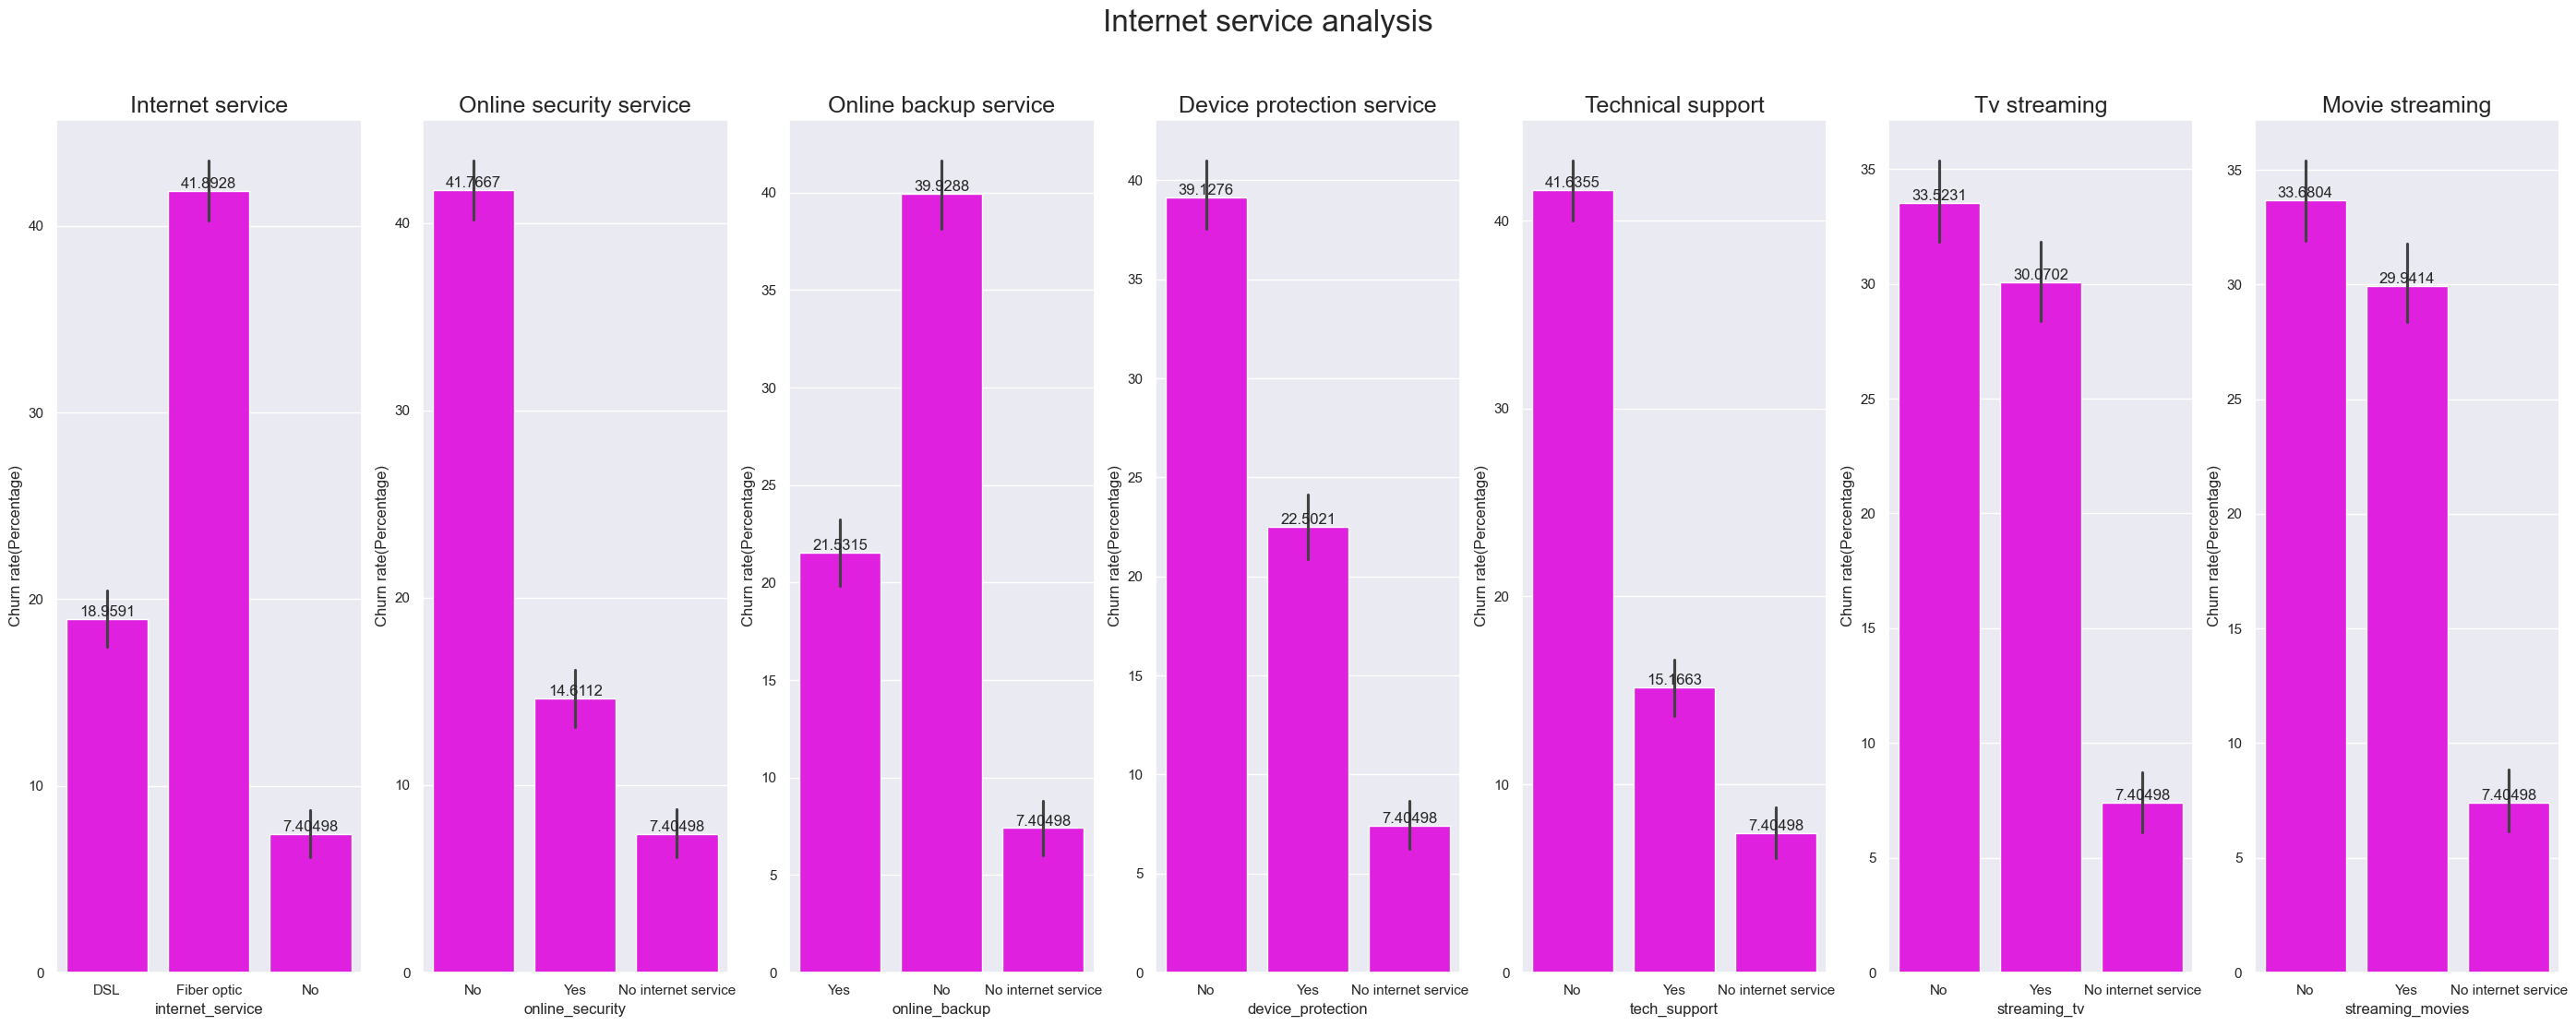

In [65]:
plt.figure(figsize=[35,12])
sns.color_palette("husl", 9)

plt.suptitle('Internet service analysis', fontsize = 24)
plt.subplot(1,7,1)
ax = sns.barplot(x=df['internet_service'], y=df['churn']*100, data=df, color="magenta");
plt.title('Internet service', fontsize=18);
plt.ylabel('Churn rate(Percentage)')
ax.bar_label(ax.containers[0])

plt.subplot(1,7,2)
ax= sns.barplot(x=df['online_security'], y=df['churn']*100, data=df, color="magenta");
plt.title('Online security service', fontsize=18);
plt.ylabel('Churn rate(Percentage)')
ax.bar_label(ax.containers[0])

plt.subplot(1,7,3)
ax = sns.barplot(x=df['online_backup'], y=df['churn']*100, data=df, color="magenta");
plt.title('Online backup service', fontsize=18);
plt.ylabel('Churn rate(Percentage)')
ax.bar_label(ax.containers[0])

plt.subplot(1,7,4)
ax = sns.barplot(x=df['device_protection'], y=df['churn']*100, data=df, color="magenta");
plt.title('Device protection service', fontsize=18);
plt.ylabel('Churn rate(Percentage)')
ax.bar_label(ax.containers[0])

plt.subplot(1,7,5)
ax = sns.barplot(x=df['tech_support'], y=df['churn']*100, data=df, color="magenta");
plt.title('Technical support', fontsize=18);
plt.ylabel('Churn rate(Percentage)')
ax.bar_label(ax.containers[0])


plt.subplot(1,7,6)
ax = sns.barplot(x=df['streaming_tv'], y=df['churn']*100, data=df, color="magenta");
plt.title('Tv streaming', fontsize=18);
plt.ylabel('Churn rate(Percentage)')

ax.bar_label(ax.containers[0])

plt.subplot(1,7,7)
ax = sns.barplot(x=df['streaming_movies'], y=df['churn']*100, data=df, color="magenta");
plt.title('Movie streaming', fontsize=18);
ax.bar_label(ax.containers[0])

sns.set_theme(rc={'figure.figsize':(10,7)})
plt.ylabel('Churn rate(Percentage)')
plt.savefig("internetservices.png")

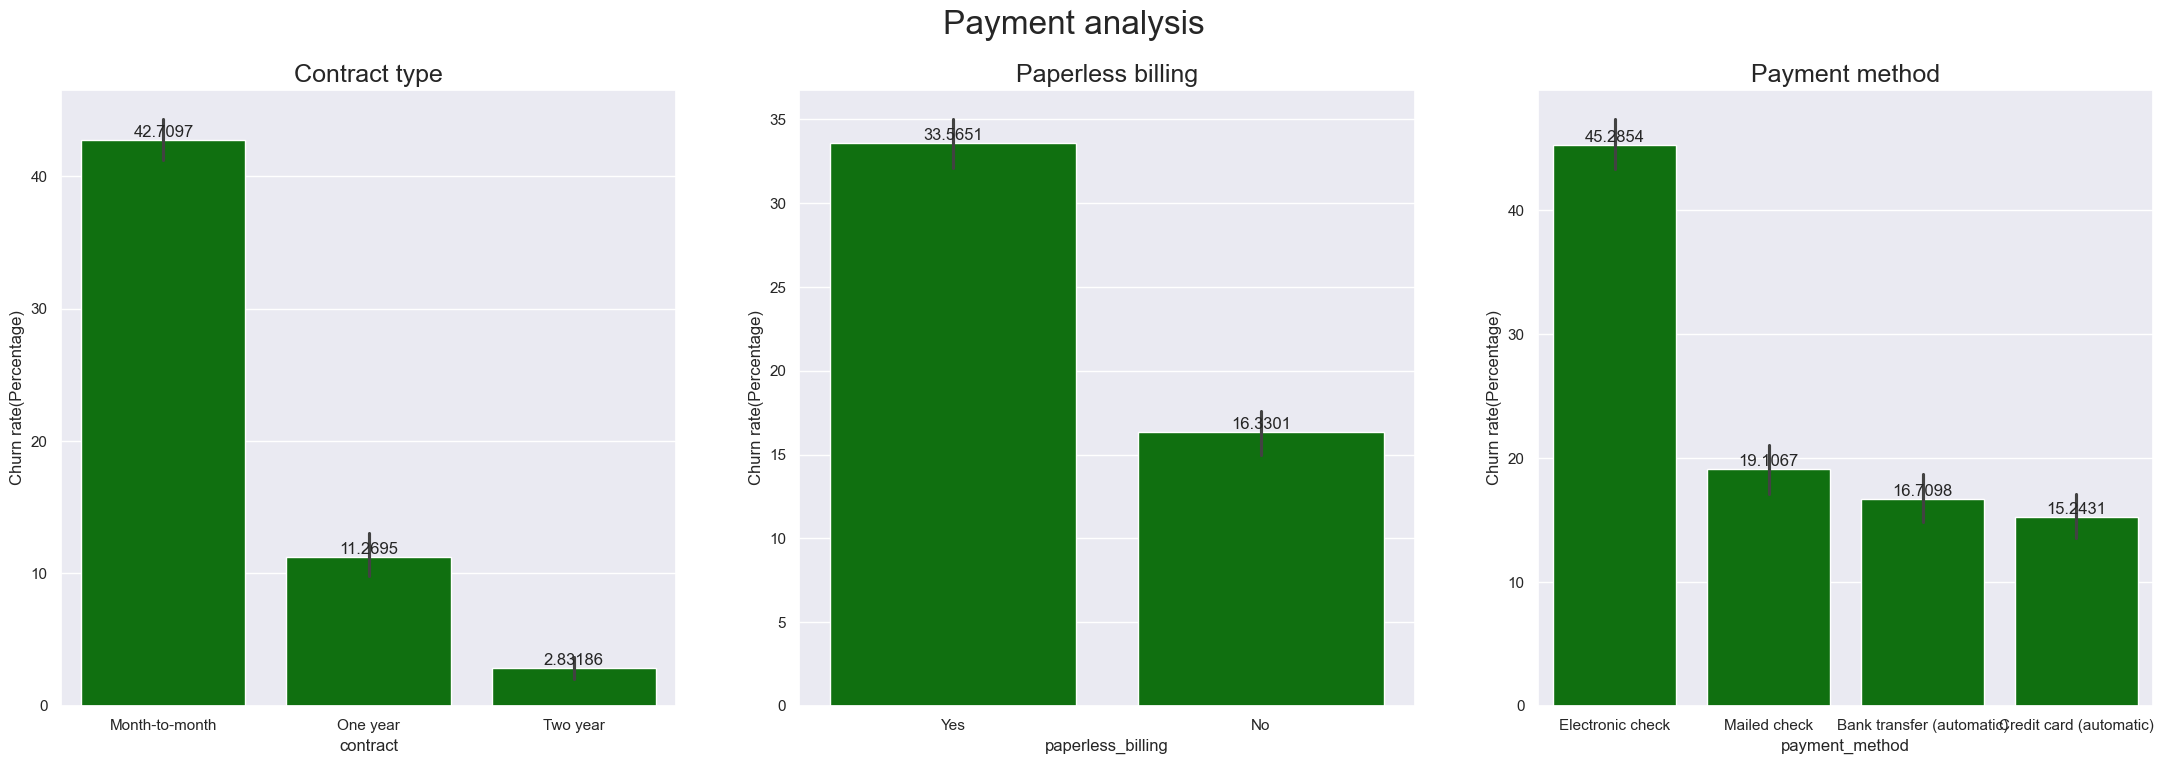

In [66]:
plt.figure(figsize=[27,8])

plt.suptitle('Payment analysis', fontsize = 24)
plt.subplot(1,3,1)
ax = sns.barplot(x=df['contract'], y=df['churn']*100, data=df, color="green");
plt.title('Contract type', fontsize=18);
ax.bar_label(ax.containers[0])
plt.ylabel('Churn rate(Percentage)')

plt.subplot(1,3,2)
ax= sns.barplot(x=df['paperless_billing'], y=df['churn']*100, data=df, color="green");
plt.title('Paperless billing', fontsize=18);
ax.bar_label(ax.containers[0])
plt.ylabel('Churn rate(Percentage)')

plt.subplot(1,3,3)
ax = sns.barplot(x=df['payment_method'], y=df['churn']*100, data=df, color="green");
plt.title('Payment method', fontsize=18);
ax.bar_label(ax.containers[0])
plt.ylabel('Churn rate(Percentage)')



sns.set_theme(rc={'figure.figsize':(10,7)})

plt.savefig("payment.png")

In [67]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [68]:
df.total_charges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: total_charges, Length: 7043, dtype: object

In [69]:
churn_dagilim = pd.DataFrame(df.churn.value_counts())
churn_dagilim

,count
churn,
0,5174
1,1869


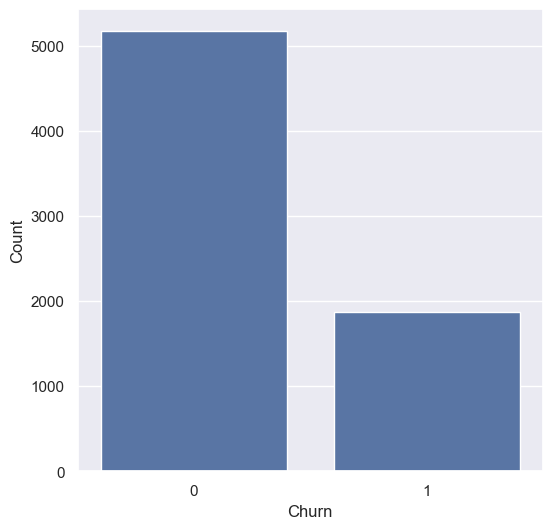

In [70]:
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.barplot(x=churn_dagilim.index, y=churn_dagilim['count'], data=churn_dagilim);
plt.xlabel('Churn')
plt.ylabel('Count')
plt.savefig("churn.png")

In [71]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [72]:
df = pd.get_dummies(df, columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 
                                 'online_security',  'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                                 'streaming_movies', 'contract', 'paperless_billing', 'payment_method'], drop_first=True, dtype=int)
df

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.5,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.9,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.6,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   int64  
 1   tenure                                  7043 non-null   int64  
 2   monthly_charges                         7043 non-null   float64
 3   total_charges                           7043 non-null   object 
 4   churn                                   7043 non-null   int32  
 5   gender_Male                             7043 non-null   int32  
 6   partner_Yes                             7043 non-null   int32  
 7   dependents_Yes                          7043 non-null   int32  
 8   phone_service_Yes                       7043 non-null   int32  
 9   multiple_lines_No phone service         7043 non-null   int32  
 10  multiple_lines_Yes                      7043 non-null   int3

In [74]:
df.loc[df['total_charges'] == ' ']

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
488,0,0,52.55,,0,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
753,0,0,20.25,,0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
936,0,0,80.85,,0,0,1,1,1,0,...,0,1,0,1,0,1,0,0,0,1
1082,0,0,25.75,,0,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1340,0,0,56.05,,0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3331,0,0,19.85,,0,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3826,0,0,25.35,,0,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
4380,0,0,20.00,,0,0,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
5218,0,0,19.70,,0,1,1,1,1,0,...,1,0,1,0,1,0,1,0,0,1
6670,0,0,73.35,,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [75]:
df = df.drop(df[df['total_charges'] == ' '].index)
df['total_charges'] = df['total_charges'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7032 non-null   int64  
 1   tenure                                  7032 non-null   int64  
 2   monthly_charges                         7032 non-null   float64
 3   total_charges                           7032 non-null   float64
 4   churn                                   7032 non-null   int32  
 5   gender_Male                             7032 non-null   int32  
 6   partner_Yes                             7032 non-null   int32  
 7   dependents_Yes                          7032 non-null   int32  
 8   phone_service_Yes                       7032 non-null   int32  
 9   multiple_lines_No phone service         7032 non-null   int32  
 10  multiple_lines_Yes                      7032 non-null   int32  
 

In [76]:
df.insert(0,'churnyeni',df['churn'])

In [77]:
df = df.drop('churn', axis=1)
df.rename(columns = {'churnyeni':'churn'}, inplace = True) 
df['churn'] = df['churn'].astype(int)

In [78]:
df.head()

,churn,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


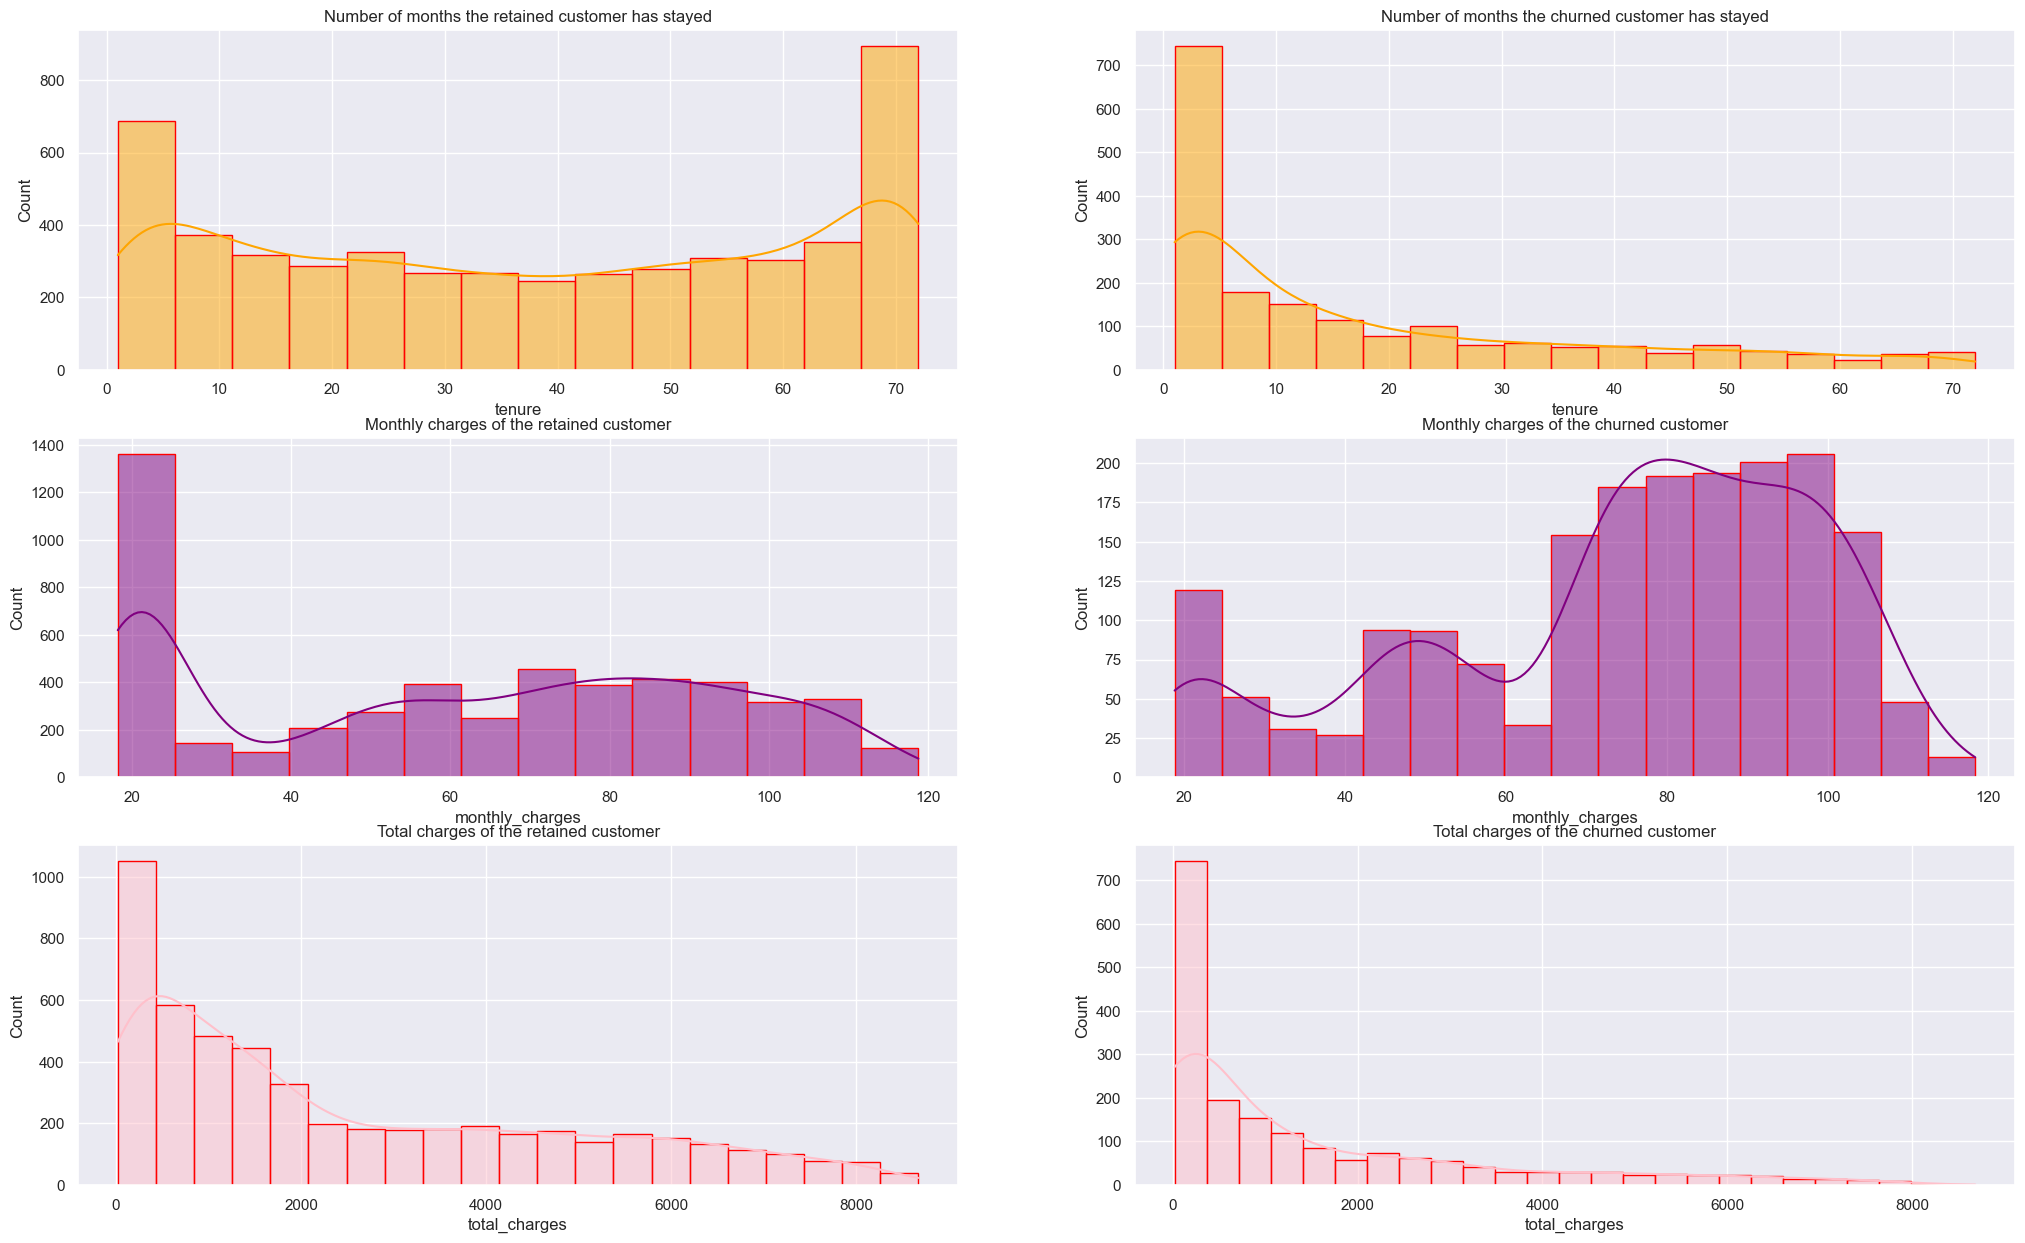

In [79]:
plt.figure(figsize=[25,15])

plt.subplot(3,2,1)
sns.histplot(data = df.loc[df['churn']==0, 'tenure'], color='orange', edgecolor='red', kde=True)
plt.title('Number of months the retained customer has stayed');

plt.subplot(3,2,2)
sns.histplot(data = df.loc[df['churn']==1, 'tenure'],color='orange', edgecolor='red', kde=True)
plt.title('Number of months the churned customer has stayed');

plt.subplot(3,2,3)
sns.histplot(data = df.loc[df['churn']==0, 'monthly_charges'],color='purple', edgecolor='red', kde=True)
plt.title('Monthly charges of the retained customer');

plt.subplot(3,2,4)
sns.histplot(data = df.loc[df['churn']==1, 'monthly_charges'],color='purple', edgecolor='red', kde=True)
plt.title('Monthly charges of the churned customer');

plt.subplot(3,2,5)
sns.histplot(data = df.loc[df['churn']==0, 'total_charges'],color='pink', edgecolor='red', kde=True)
plt.title('Total charges of the retained customer');

plt.subplot(3,2,6)
sns.histplot(data = df.loc[df['churn']==1, 'total_charges'],color='pink', edgecolor='red', kde=True)
plt.title('Total charges of the churned customer');
plt.savefig("histogramdagilimi.png")

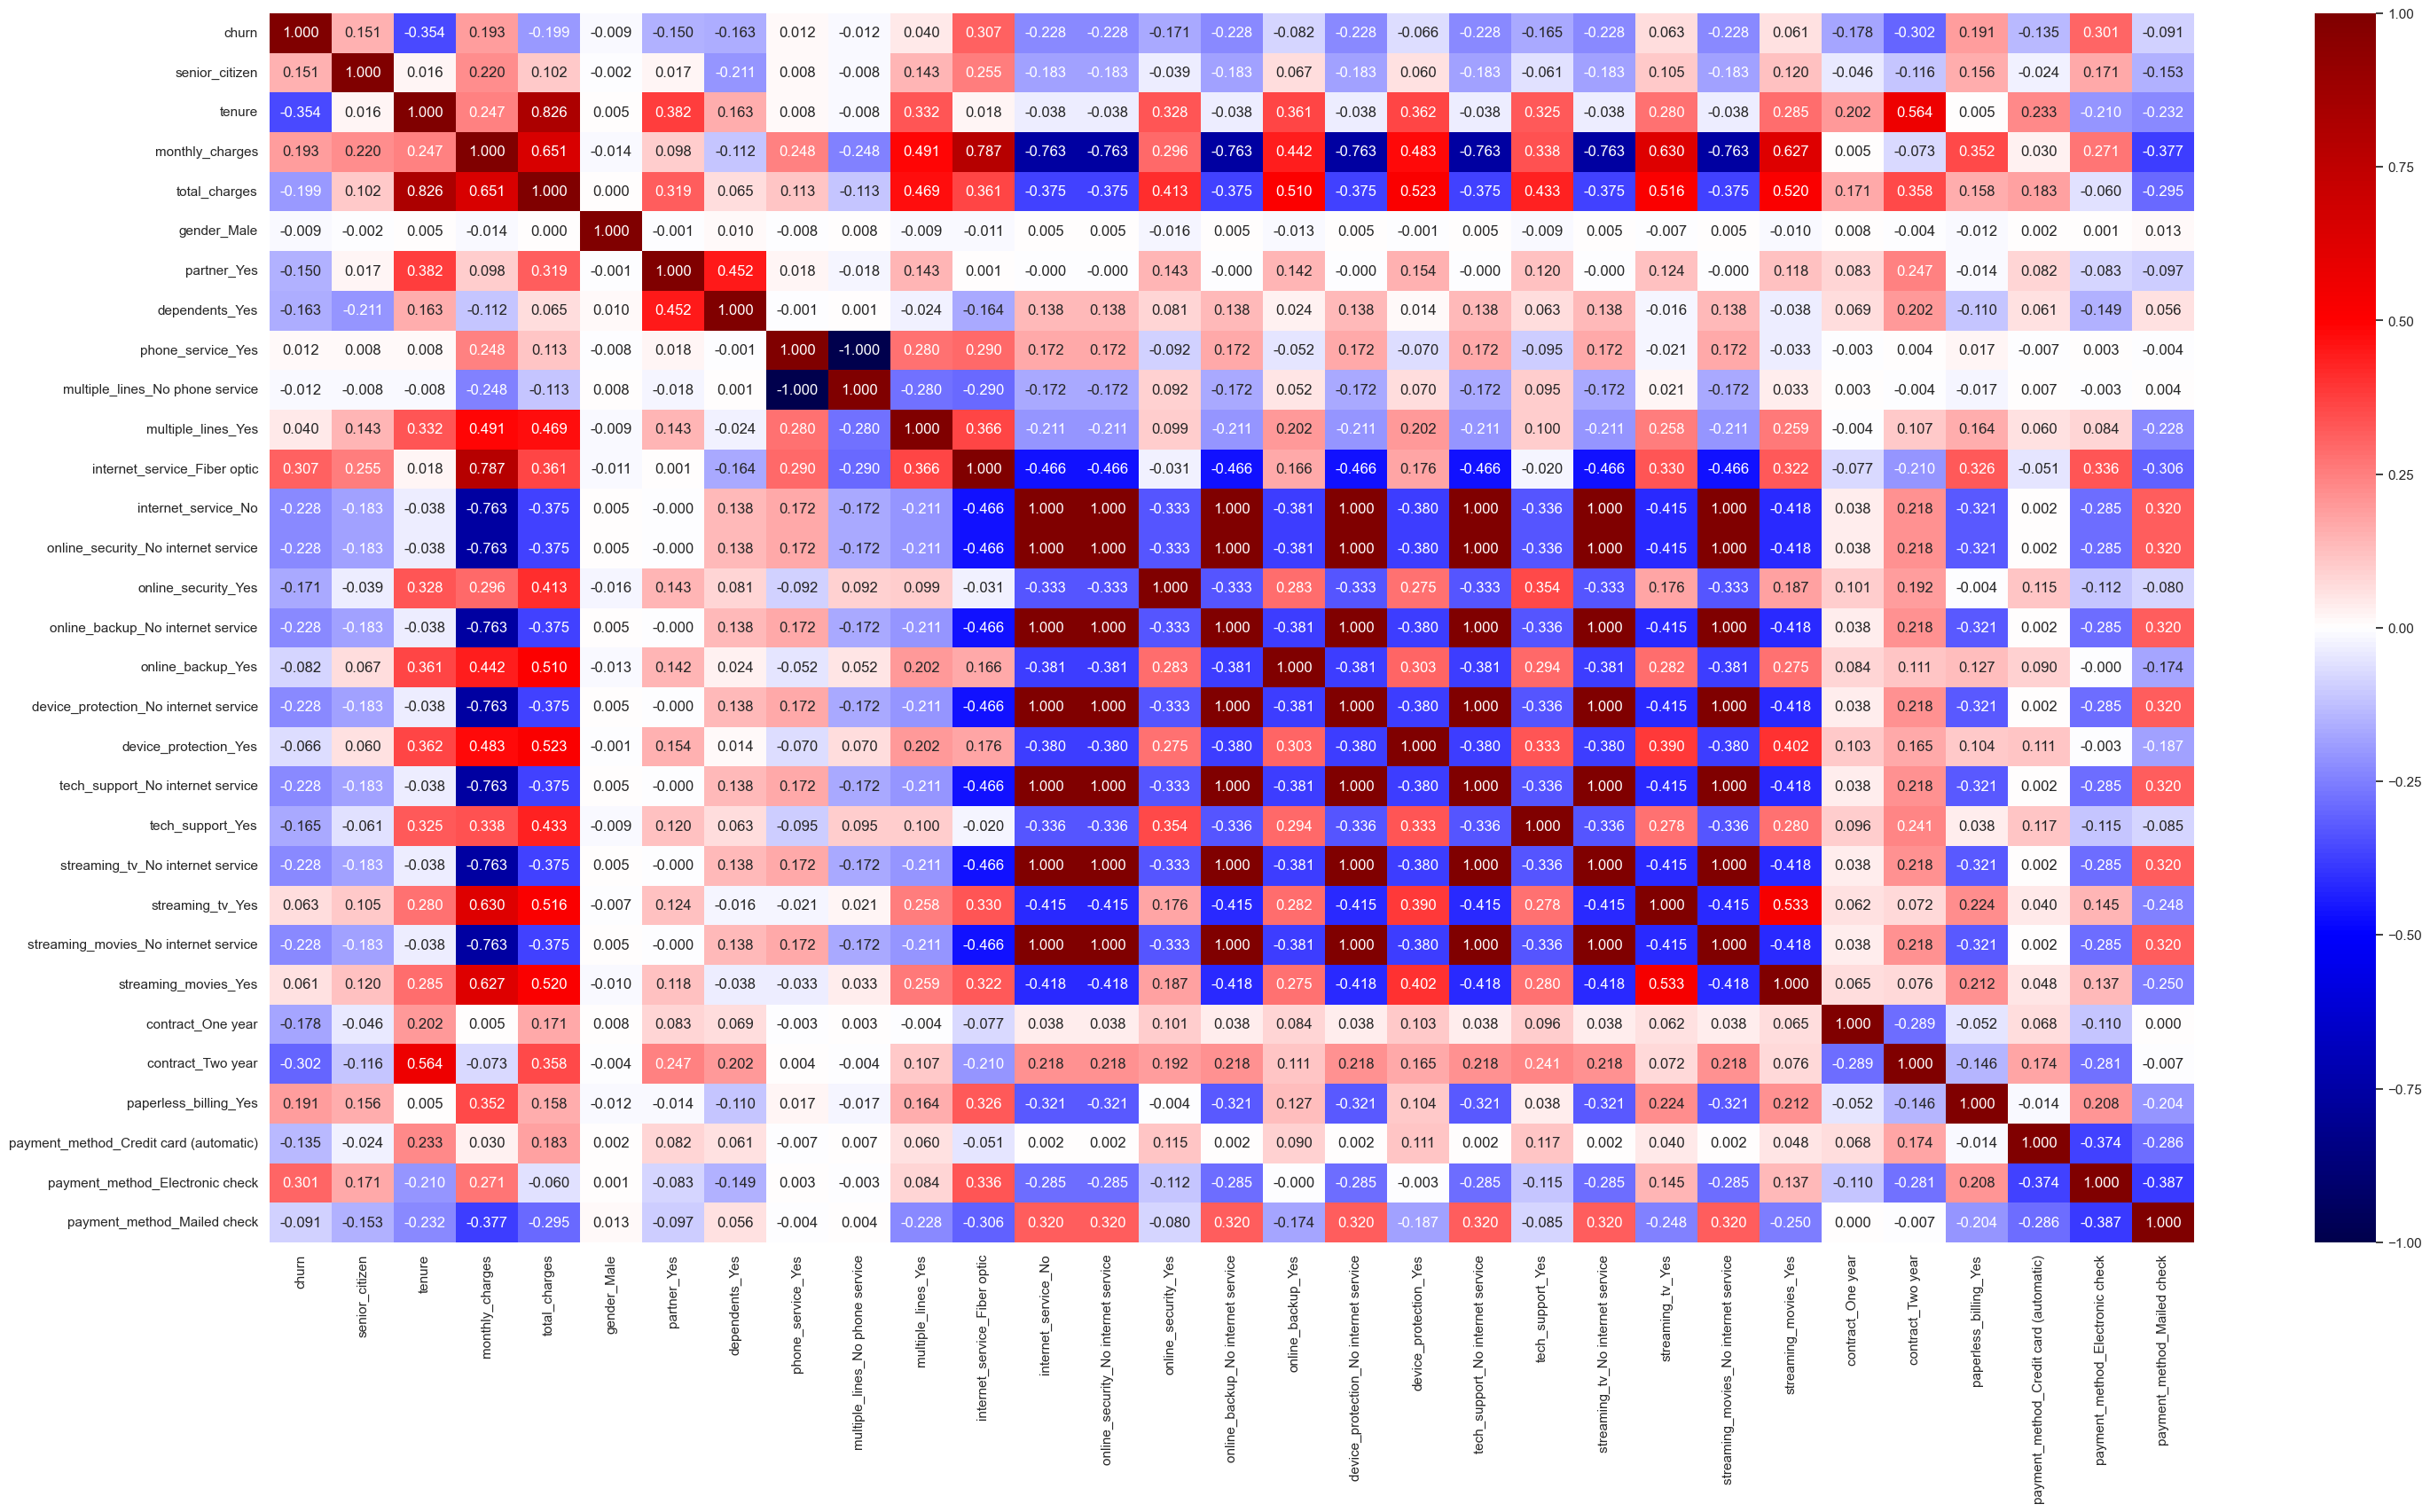

In [80]:
plt.figure(figsize=[35,18])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.3f');
plt.savefig("finalheatmap.png")

In [81]:
df.columns

Index(['churn', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_One year', 'contract_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype='object')

In [82]:
df.shape

(7032, 31)

In [83]:
coef = df.corr()['churn'].sort_values(ascending=False)
coef

churn                                     1.000000
internet_service_Fiber optic              0.307463
payment_method_Electronic check           0.301455
monthly_charges                           0.192858
paperless_billing_Yes                     0.191454
senior_citizen                            0.150541
streaming_tv_Yes                          0.063254
streaming_movies_Yes                      0.060860
multiple_lines_Yes                        0.040033
phone_service_Yes                         0.011691
gender_Male                              -0.008545
multiple_lines_No phone service          -0.011691
device_protection_Yes                    -0.066193
online_backup_Yes                        -0.082307
payment_method_Mailed check              -0.090773
payment_method_Credit card (automatic)   -0.134687
partner_Yes                              -0.149982
dependents_Yes                           -0.163128
tech_support_Yes                         -0.164716
online_security_Yes            

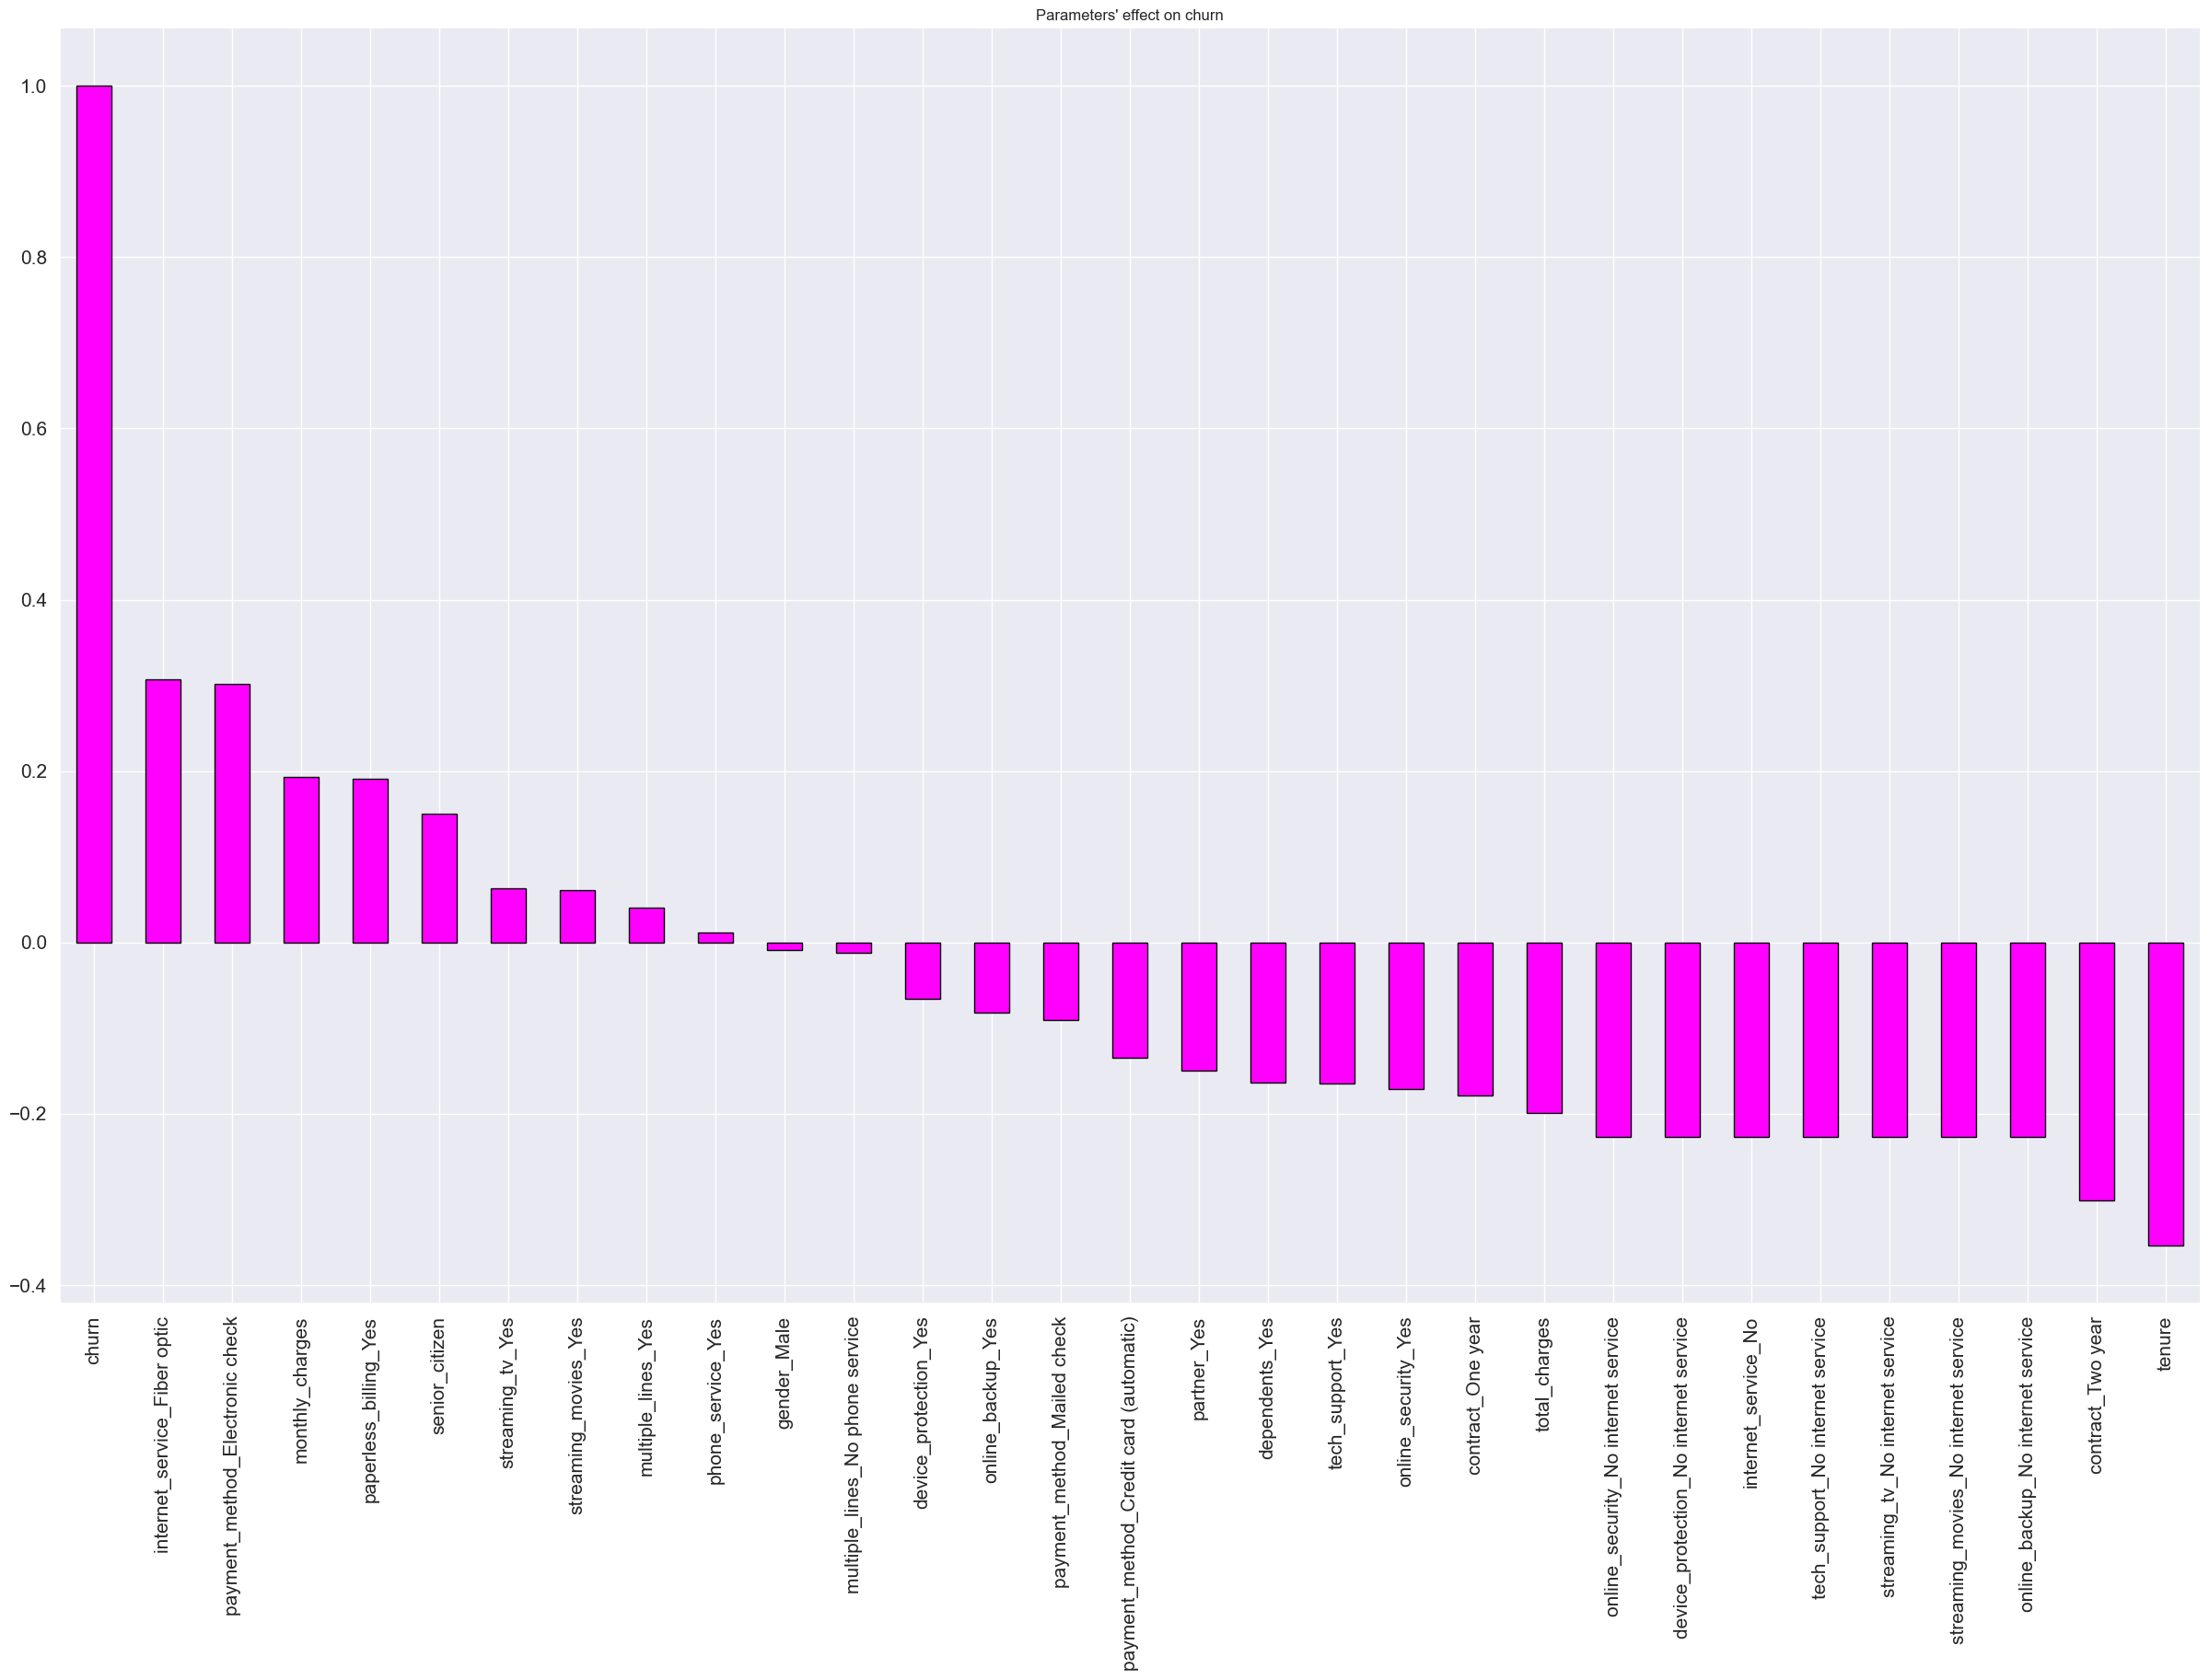

In [84]:
parameters = df.columns
coef = Series(coef,parameters).sort_values(ascending=False)
plt.figure(figsize=[30,18])
coef.plot(kind='bar', title='Parameters\' effect on churn', fontsize=15, color='fuchsia', ec='black');
plt.savefig("churndegiskenineetki.png")